# Objective

- `Optical images produced by a scintillator emit photons when exposed to X-rays`
- `Rapid motion of the object being imaged causes the captured images to suffer from blur`
- `The blur effect reduces the clarity and accuracy of the images`
- `This makes it difficult to extract precise information about the object's location and features`
- `Advanced image deblurring techniques are needed to restore image sharpness and accurate localization of the object`
- `The image captured is spherical with 10mm diameter`

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color, data, restoration

- `Image preprocessing is applied on ImageJ software`
- `Loading Cropped image`

In [7]:
img = cv.imread(r"F:\Work\Xray\Data\Blur\Result_6_30fps\163128357_0217_1.tif")

In [8]:
img.shape

(86, 42, 3)

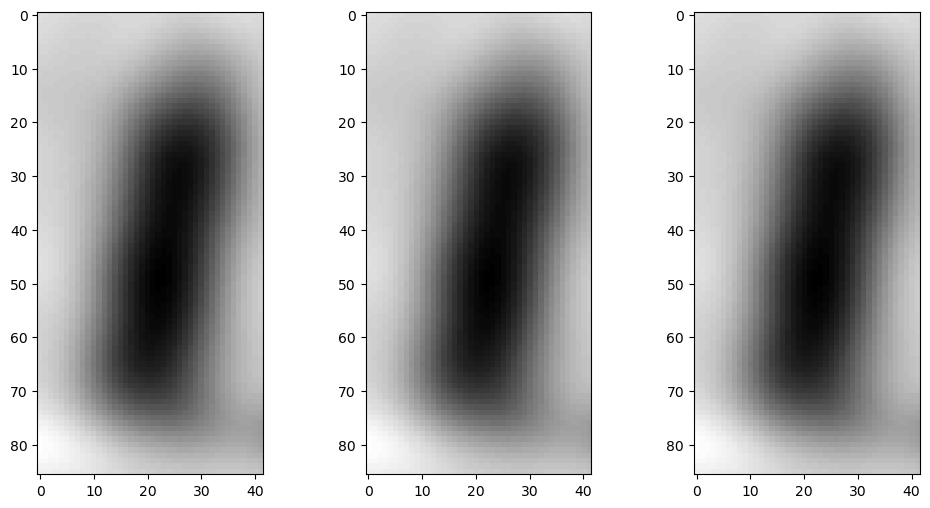

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img[:,:,1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img[:,:,2], cmap='gray')

`To reduce the dimensionality, convert 3 channels to single channel as all the channels contain similar information`

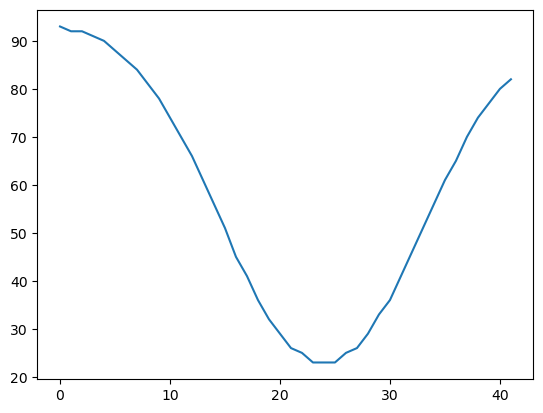

In [72]:
plt.plot(img[40,:,0])

`Clear dip indicates the gradient of the object of interest`

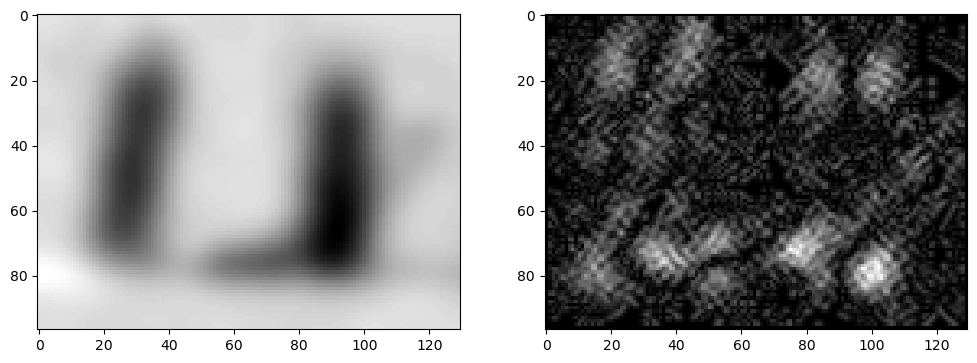

In [38]:
sobelx = cv.Sobel(src=img[:,:,0], ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img[:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cv.convertScaleAbs(sobelx), cmap='gray')

`Sobel edge detection doesn't the capture any features`

In [51]:
def sidebyside(original, converted):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(converted)

`To study more precisely, Single object is cropped and rotated by 15 degrees`

array([48, 48, 48, 45, 40, 36, 35, 33, 31, 29, 28, 27, 25, 25, 24, 23, 23,
       22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 21, 22, 22, 22, 21, 21, 21, 22, 20, 21, 22,
       20, 20, 21, 24, 29, 34, 43, 48, 48, 48, 48], dtype=int64)

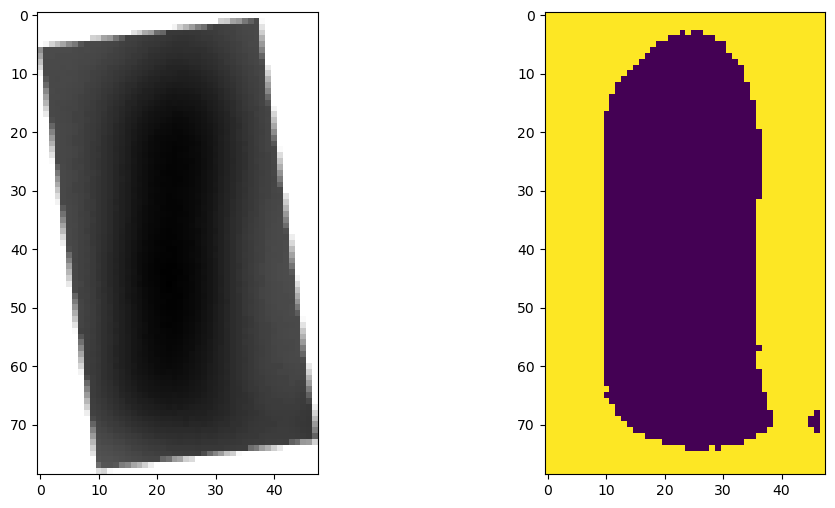

In [93]:
testimg = cv.imread(r"F:\Work\Xray_Data\Blur\Result_6_30fps\rotated1.png")
img = testimg
res, thres = cv.threshold(img[:,:,0], 70, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)
np.count_nonzero(thres, axis=1)

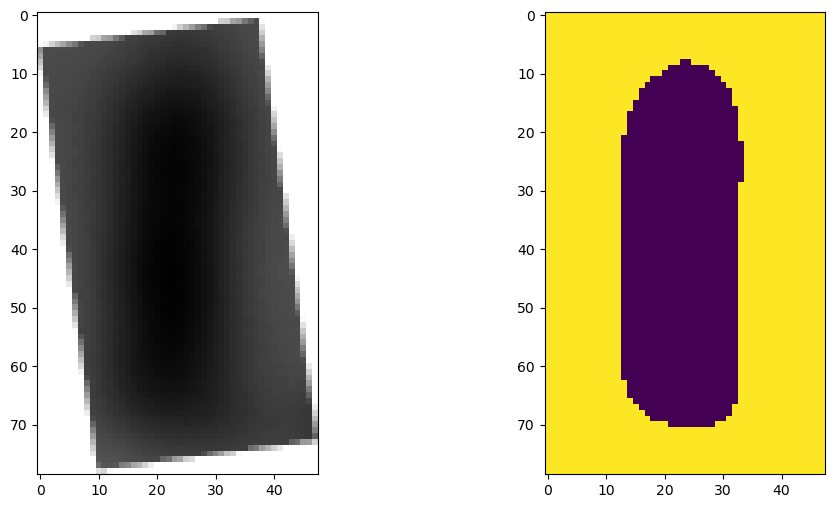

In [102]:
res, thres = cv.threshold(img[:,:,0], 55, 255, cv.THRESH_BINARY)
sidebyside(img[:,:,0], thres)

`Threshold of 75 includes much noisy components but 55 doesn't`

array([48, 48, 48, 48, 48, 48, 48, 48, 46, 41, 39, 36, 34, 32, 32, 31, 30,
       29, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 32,
       33, 35, 40, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

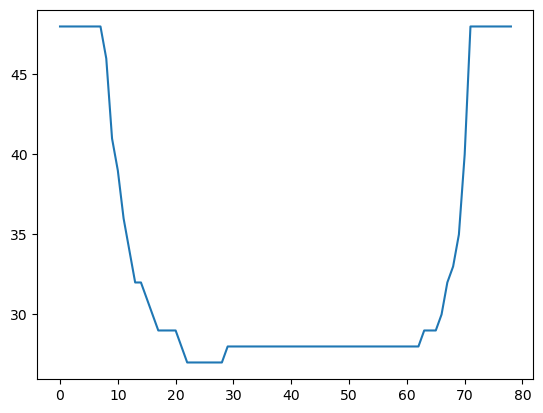

In [104]:
plt.plot(np.count_nonzero(thres, axis=1))
np.count_nonzero(thres, axis=1)

Analysing row wise 

In [91]:
np.count_nonzero(thres, axis=1)

array([48, 48, 48, 48, 48, 48, 48, 48, 46, 41, 39, 36, 34, 32, 32, 31, 30,
       29, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 32,
       33, 35, 40, 48, 48, 48, 48, 48, 48, 48, 48], dtype=int64)

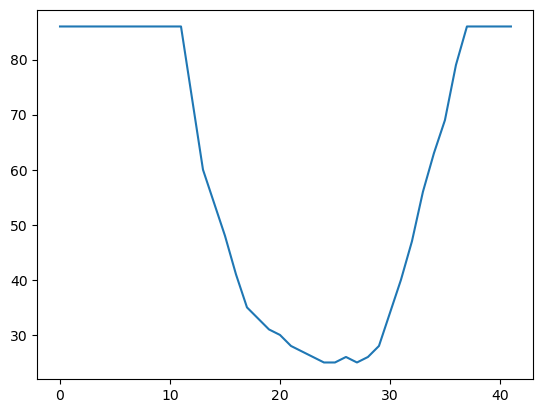

In [85]:
plt.plot(np.count_nonzero(thres, axis=0))

In [94]:
np.count_nonzero(thres, axis=0)

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 31, 26, 22, 20, 18, 16, 15,
       13, 12, 11, 10,  9,  9,  8,  8,  7,  7,  8,  9,  9, 10, 12, 13, 14,
       18, 21, 55, 72, 76, 79, 79, 79, 79, 79, 79, 77, 75, 79],
      dtype=int64)

# Blind Deblurring

- `As the Point Spread Function is unknown, blind deblurring techniques are used`
- `Assumption: Motion blur happens only in vertical direction`
- `Point Spread function needs to be estimated with the size N X 1`
- `Richardson Lucy algorithm is used for deconvolution process`

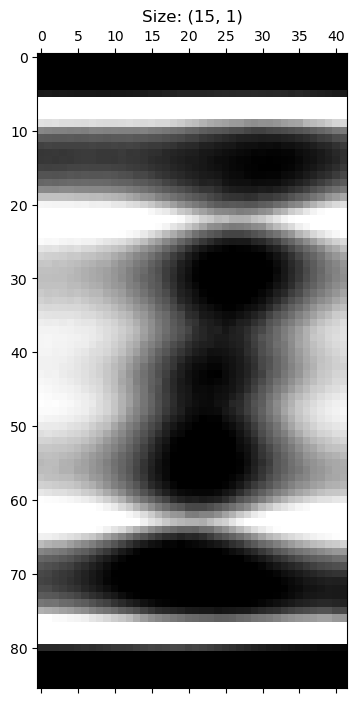

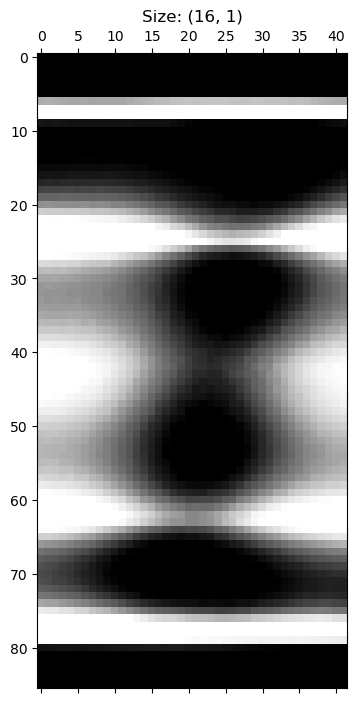

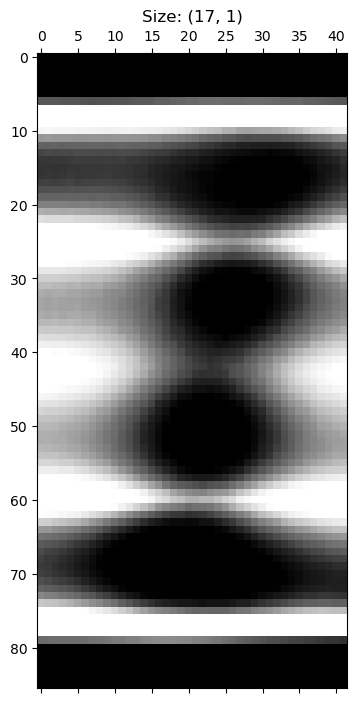

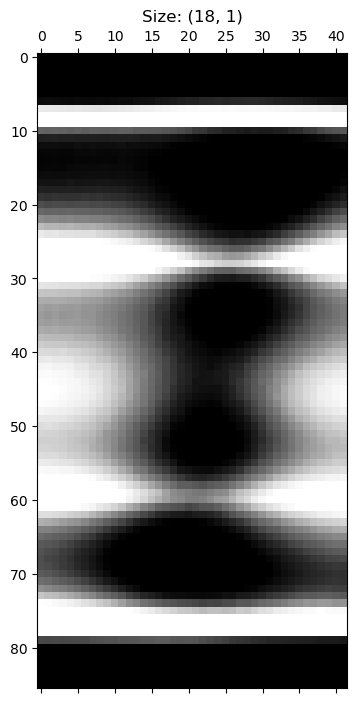

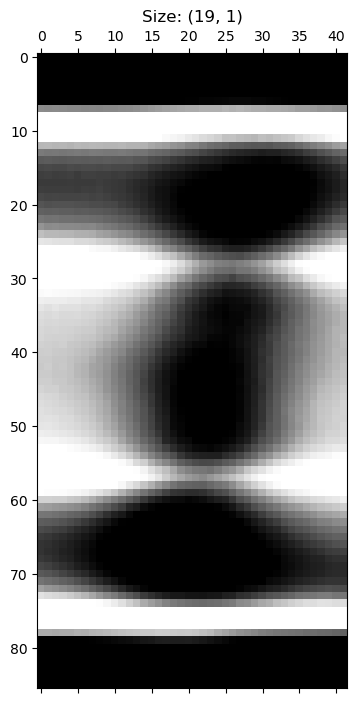

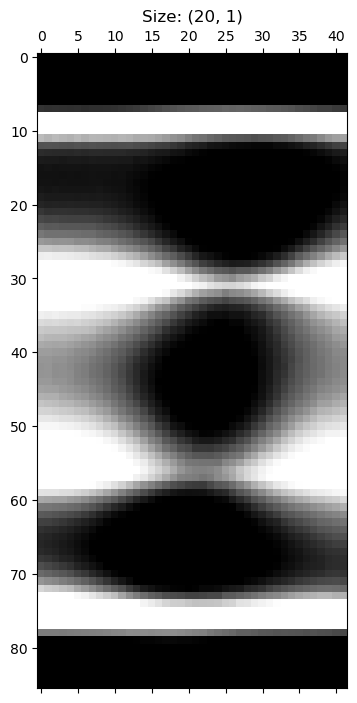

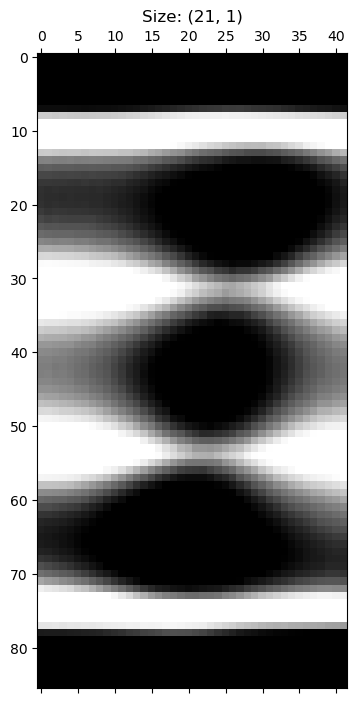

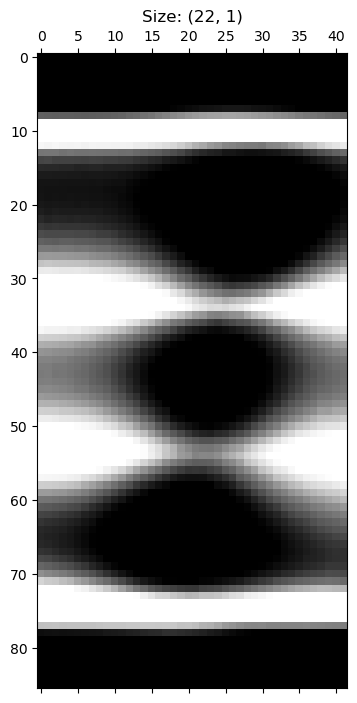

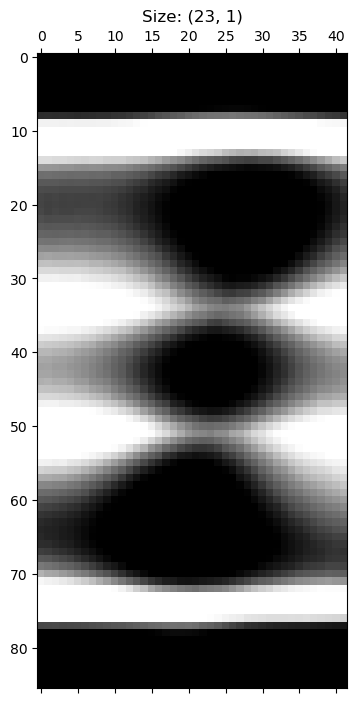

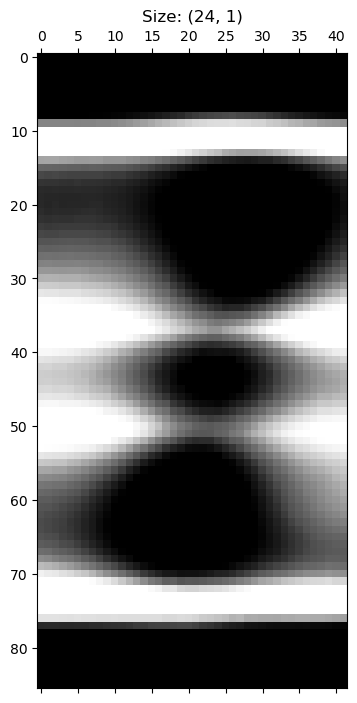

In [87]:
for i in range(15, 25, 1):
    kernel = np.ones((i,1))/(i)
    deconvolved = restoration.richardson_lucy(img[:,:,0], kernel, 30, False)
    plt.matshow(deconvolved, cmap='Greys_r', vmin=img[:,:,0].min(), vmax=img[:,:,0].max())
    plt.title('Size: ' + str(kernel.shape))

- `Size: 21 X 1 and 22 X 1 seems to be better kernel size`


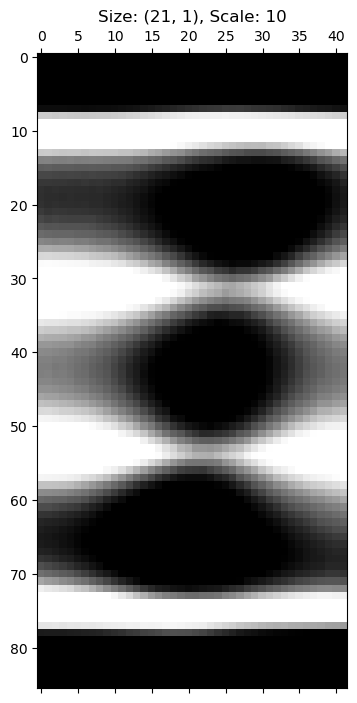

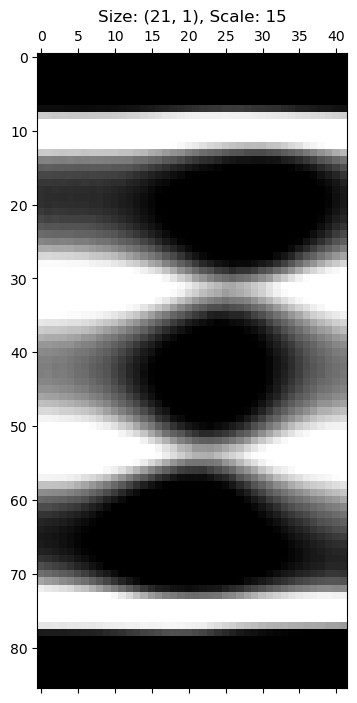

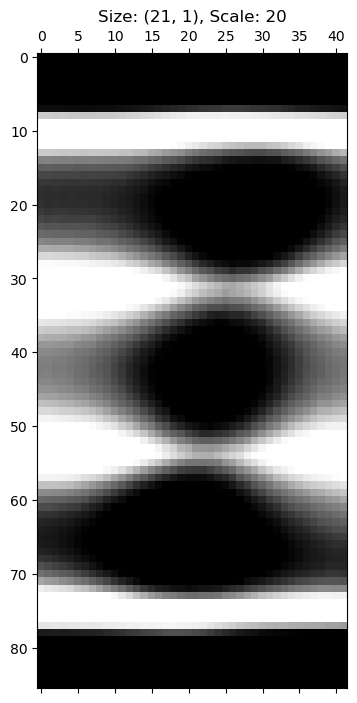

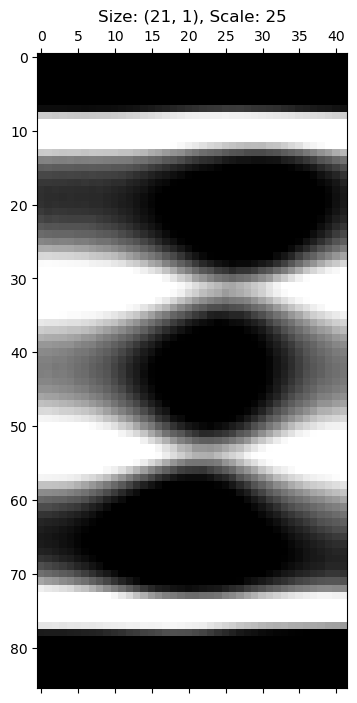

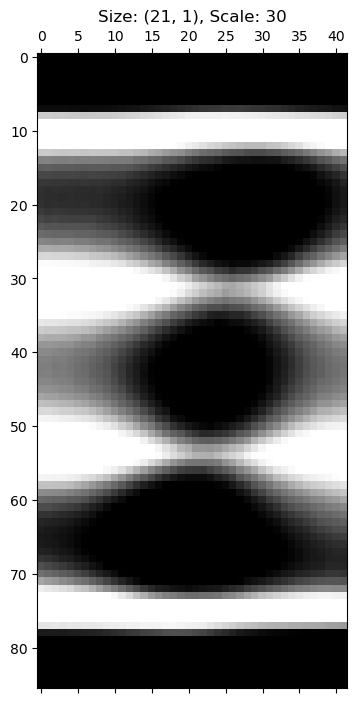

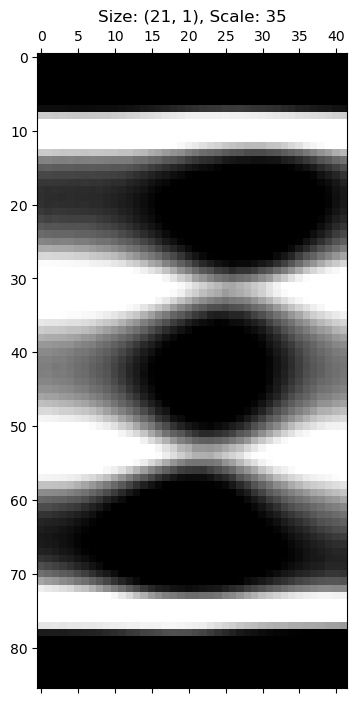

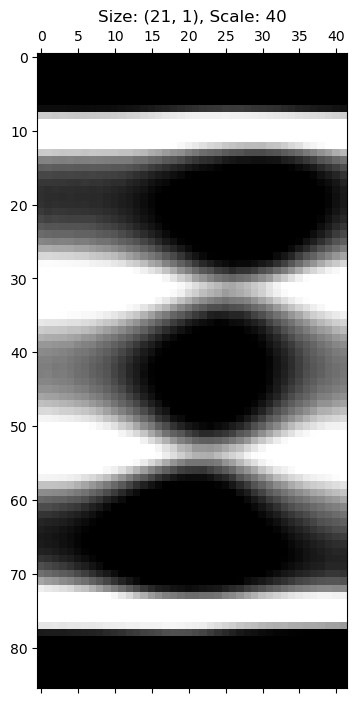

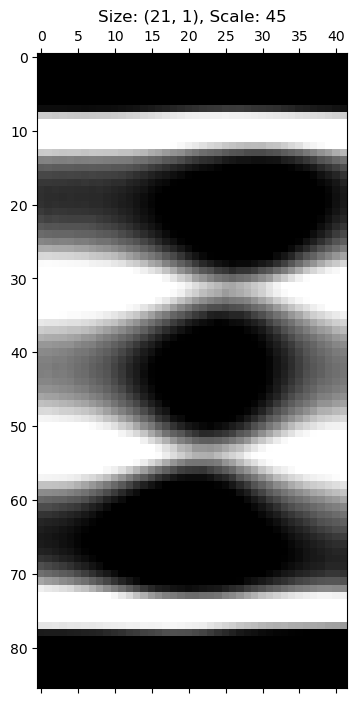

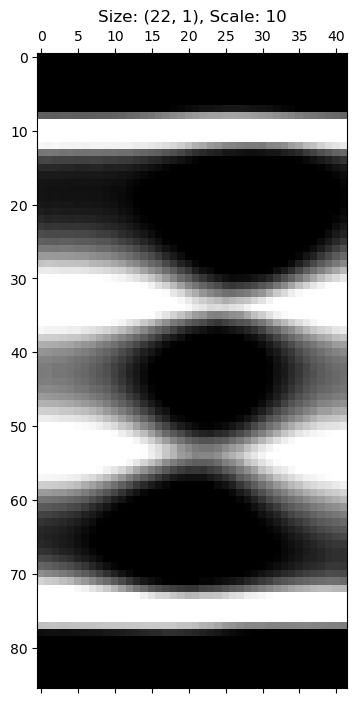

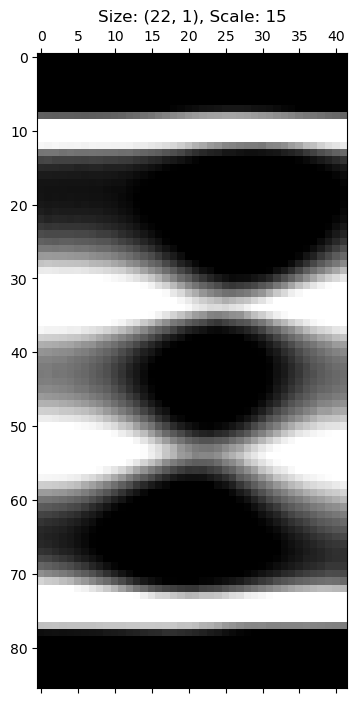

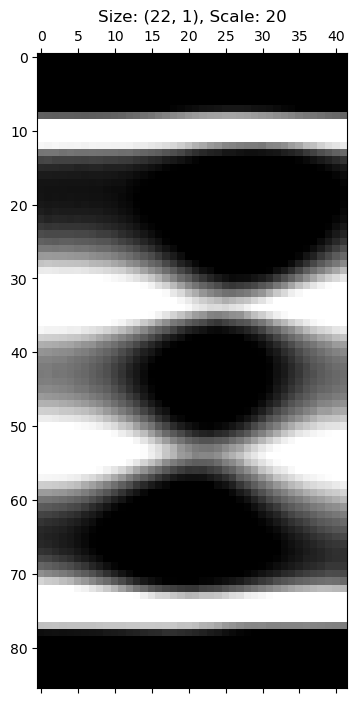

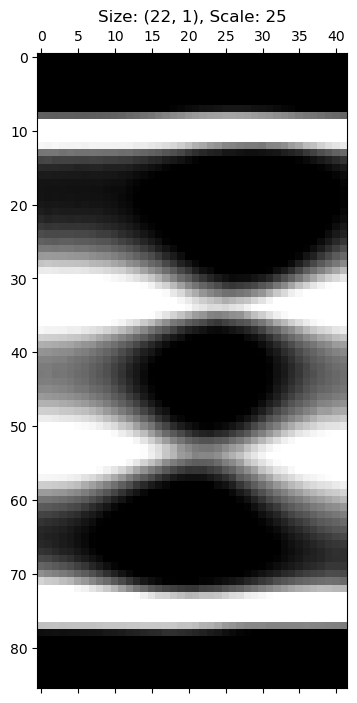

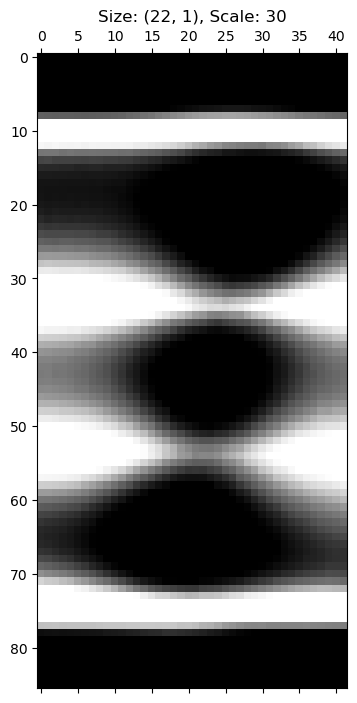

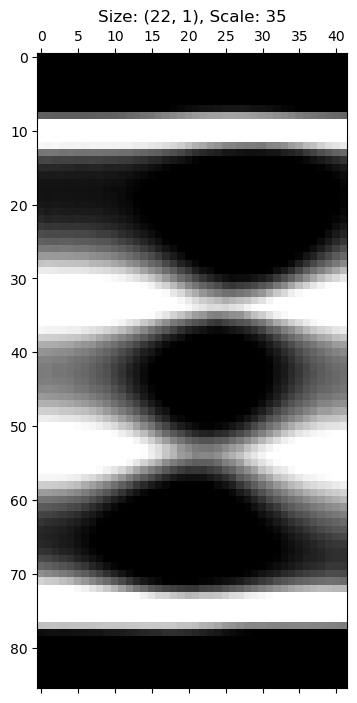

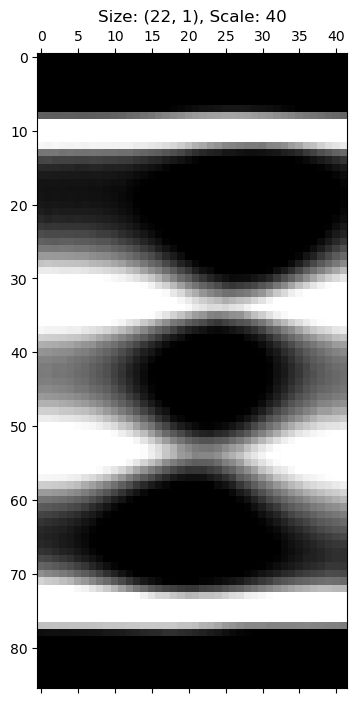

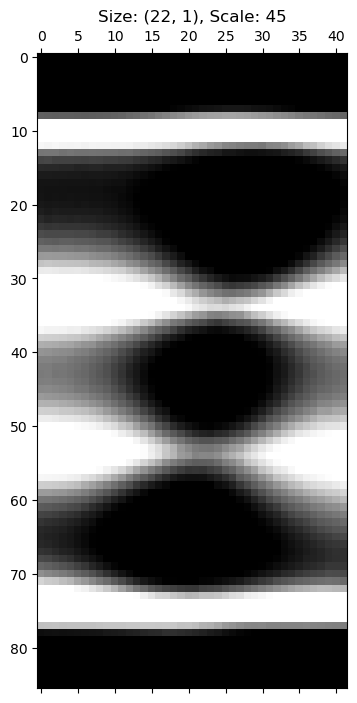

In [89]:
for j in range(21,23):
    for i in range(10, 50, 5):
        kernel = np.ones((j,1))/(i)
        deconvolved = restoration.richardson_lucy(img[:,:,0], kernel, 30, False)
        plt.matshow(deconvolved, cmap='Greys_r', vmin=img[:,:,0].min(), vmax=img[:,:,0].max())
        plt.title('Size: ' + str(kernel.shape) + ', Scale: ' + str(i))

- `Scaling of kernel doesn't have any impact on the output`

## Deconvolution for Sample 2

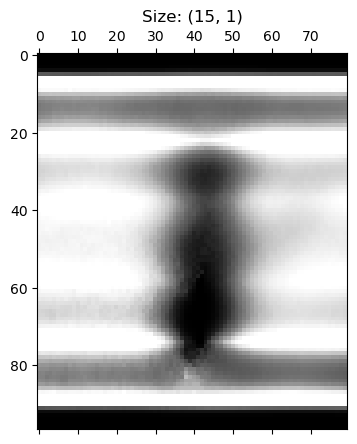

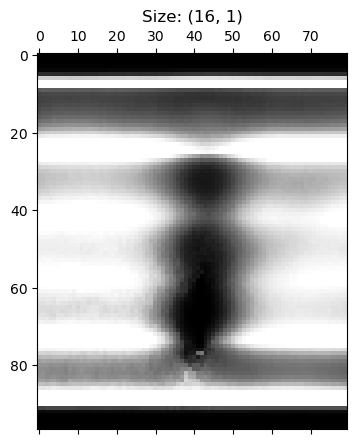

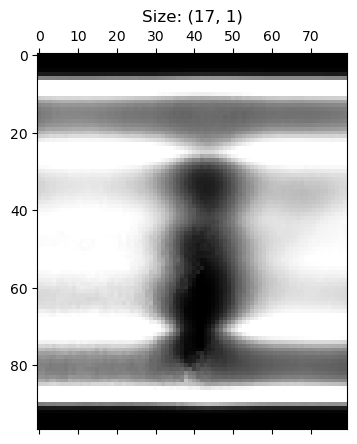

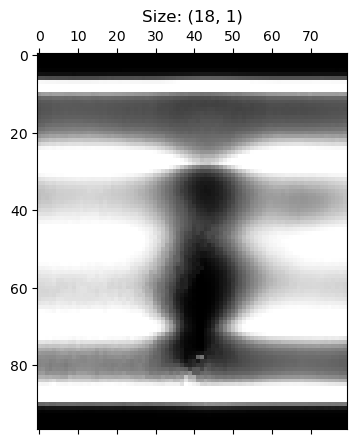

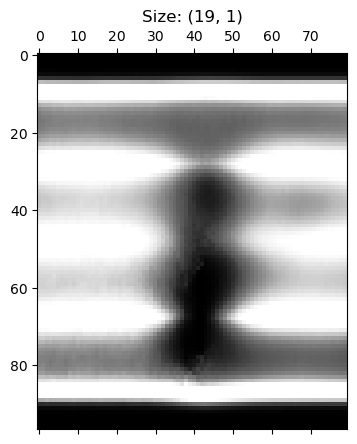

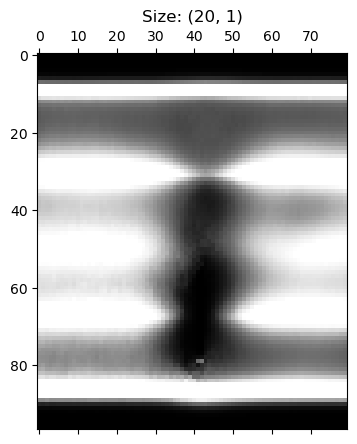

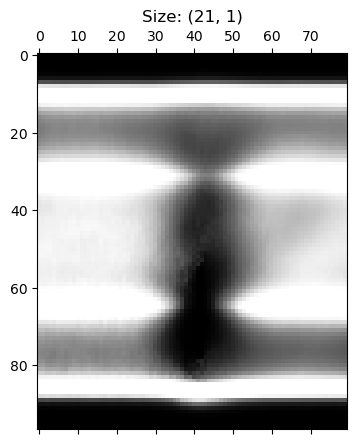

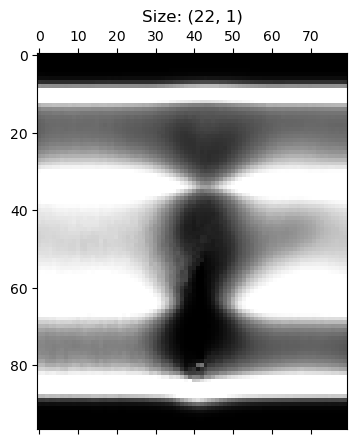

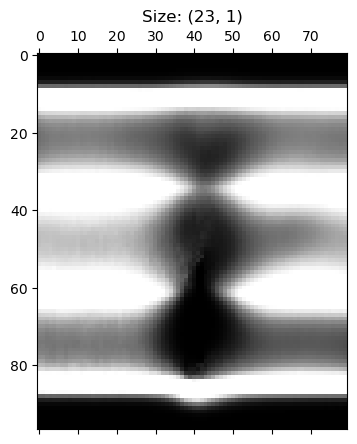

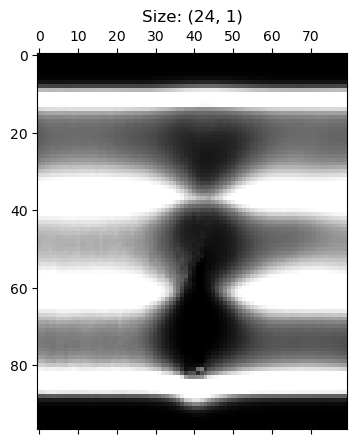

In [6]:
img2 = cv.imread(r"F:\Work\Xray\Data\Blur\Result_6_30fps\163128357_0217_2_edited.png")
for i in range(15, 25, 1):
    kernel2 = np.ones((i,1))/(i)
    deconvolved2 = restoration.richardson_lucy(img2[:,:,0], kernel2, 30, False)
    plt.matshow(deconvolved2, cmap='Greys_r', vmin=img2.min(), vmax=img2.max())
    plt.title('Size: ' + str(kernel2.shape))

In [128]:
img2.shape

(97, 80, 3)

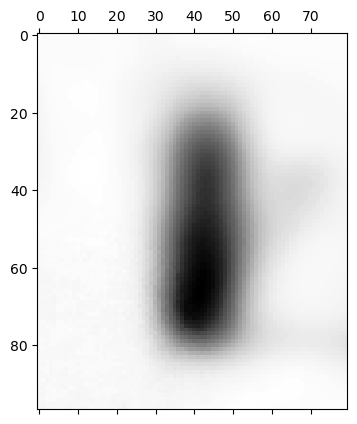

In [96]:
plt.matshow(img2[:,:,2], cmap='Greys_r')

Text(0.5, 1.0, 'All Channels')

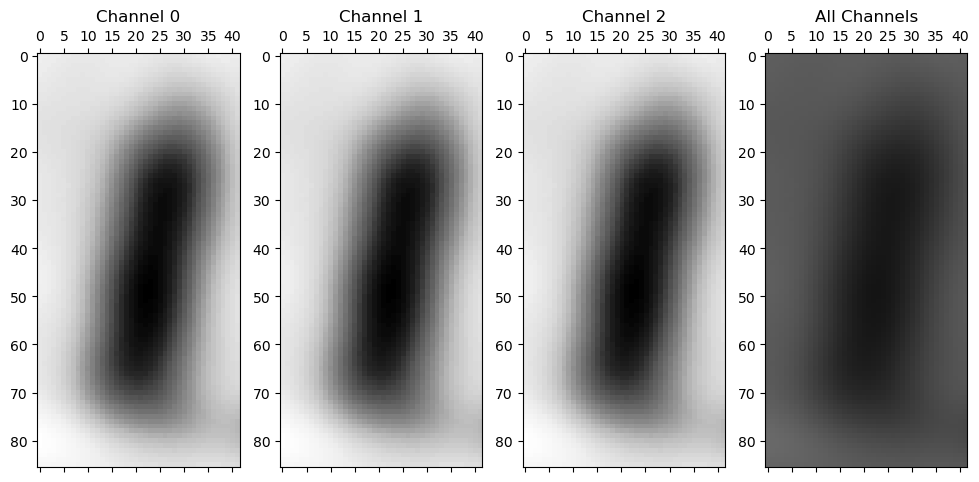

In [115]:
plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.matshow(img[:,:,0], cmap='Greys_r', fignum=False)
plt.title('Channel 0')
plt.subplot(1,4,2)
plt.matshow(img[:,:,1], cmap='Greys_r', fignum=False)
plt.title('Channel 1')
plt.subplot(1,4,3)
plt.matshow(img[:,:,2], cmap='Greys_r', fignum=False)
plt.title('Channel 2')
plt.subplot(1,4,4)
plt.matshow(img, cmap='Greys_r', fignum=False)
plt.title('All Channels')

Text(0.5, 1.0, 'All Channels')

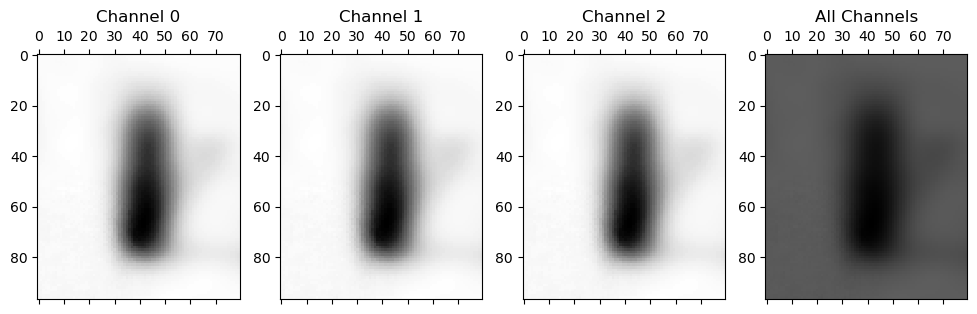

In [116]:
plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.matshow(img2[:,:,0], cmap='Greys_r', fignum=False)
plt.title('Channel 0')
plt.subplot(1,4,2)
plt.matshow(img2[:,:,1], cmap='Greys_r', fignum=False)
plt.title('Channel 1')
plt.subplot(1,4,3)
plt.matshow(img2[:,:,2], cmap='Greys_r', fignum=False)
plt.title('Channel 2')
plt.subplot(1,4,4)
plt.matshow(img2, cmap='Greys_r', fignum=False)
plt.title('All Channels')

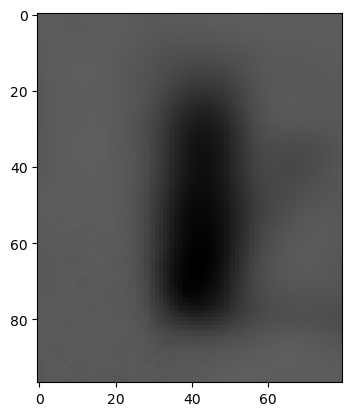

In [125]:
plt.imshow(img2, cmap='gray')

<Axes: >

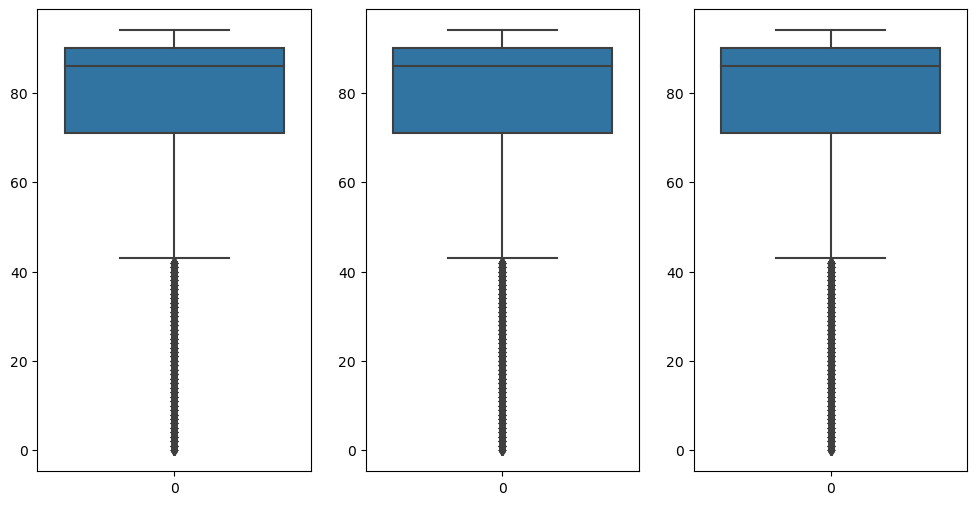

In [102]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(img2[:,:,0].flatten())
plt.subplot(1,3,2)
sns.boxplot(img2[:,:,1].flatten())
plt.subplot(1,3,3)
sns.boxplot(img2[:,:,2].flatten())

<Axes: >

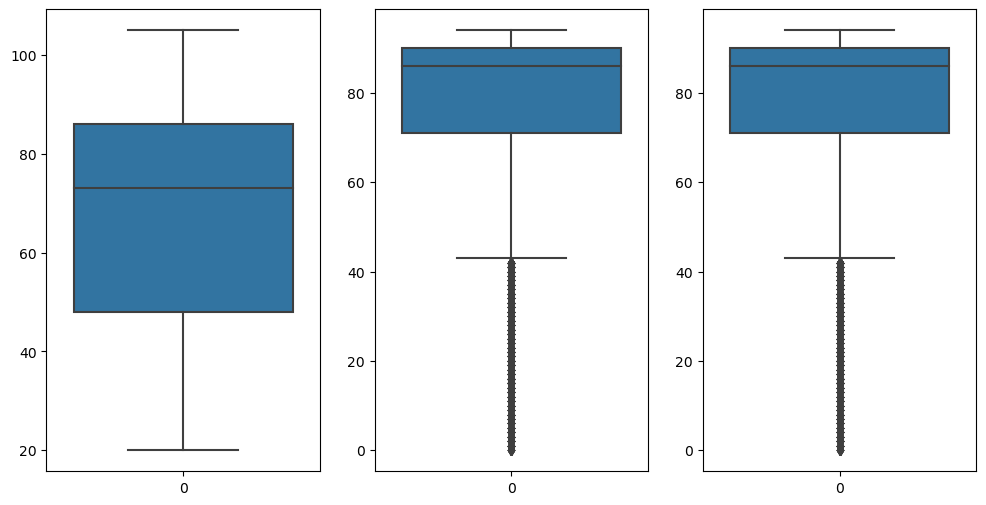

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(img[:,:,0].flatten())
plt.subplot(1,3,2)
sns.boxplot(img2[:,:,0].flatten())
plt.subplot(1,3,3)
sns.boxplot(img2[:,:,2].flatten())